# Introduction
# SBA - Small Business Profiles for the States and Territories

The Office of Advocacy’s Small Business Profiles are an annual analysis of each state’s small business activities. Each profile gathers the latest information from key federal data-gathering agencies to provide a snapshot of small business health and economic activity. This year’s profiles report on state economic growth and employment; small business employment, industry composition, and turnover; plus business owner demographics and county-level employment change. 

https://www.sba.gov/

In [1]:
from IPython.core.display import display, HTML
display(HTML("""<style> .container {width:96% !important;}</style>"""))

from IPython.display import IFrame

In [2]:
import pandas as pd
import multiprocessing
import numpy as np
from multiprocessing.dummy import Pool as ThreadPool
from functools import partial
import math

# Handle s3 or local
import s3fs
from os import listdir
from os.path import isfile, join
import subprocess

# Dataset
This Dataset from the U.S. Small Business Administration (SBA) can be download from this website

https://www.sba.gov/advocacy/small-business-profiles-states-and-territories-2016

# Experiment:
Assess the pros and cons of the most popular libraries to read pdf's

## Path to the files

In [7]:
import Tools

ImportError: No module named Tools

## Files description

In [4]:
def list_files(path,ext = 'pdf'):
    if path.startswith('s3://'):  
        onlyfiles = subprocess.check_output(['aws', 's3', 'ls', s3])
        onlyfiles = onlyfiles.split('\n')
        onlyfiles = [f.split(" ")[-1] for f in onlyfiles]
    else:
        onlyfiles = [f for f in listdir(local) if isfile(join(local, f))]
    onlyfiles = [f for f in onlyfiles if f.endswith('.{}'.format(ext))]
    files = [f.replace('.{}'.format(ext),'') for f in onlyfiles]
    return files

In [5]:
def path(path,name,ext = 'pdf'):
    path_file = '{}{}.{}'.format(path,name,ext)
    return path_file

# The pdfs

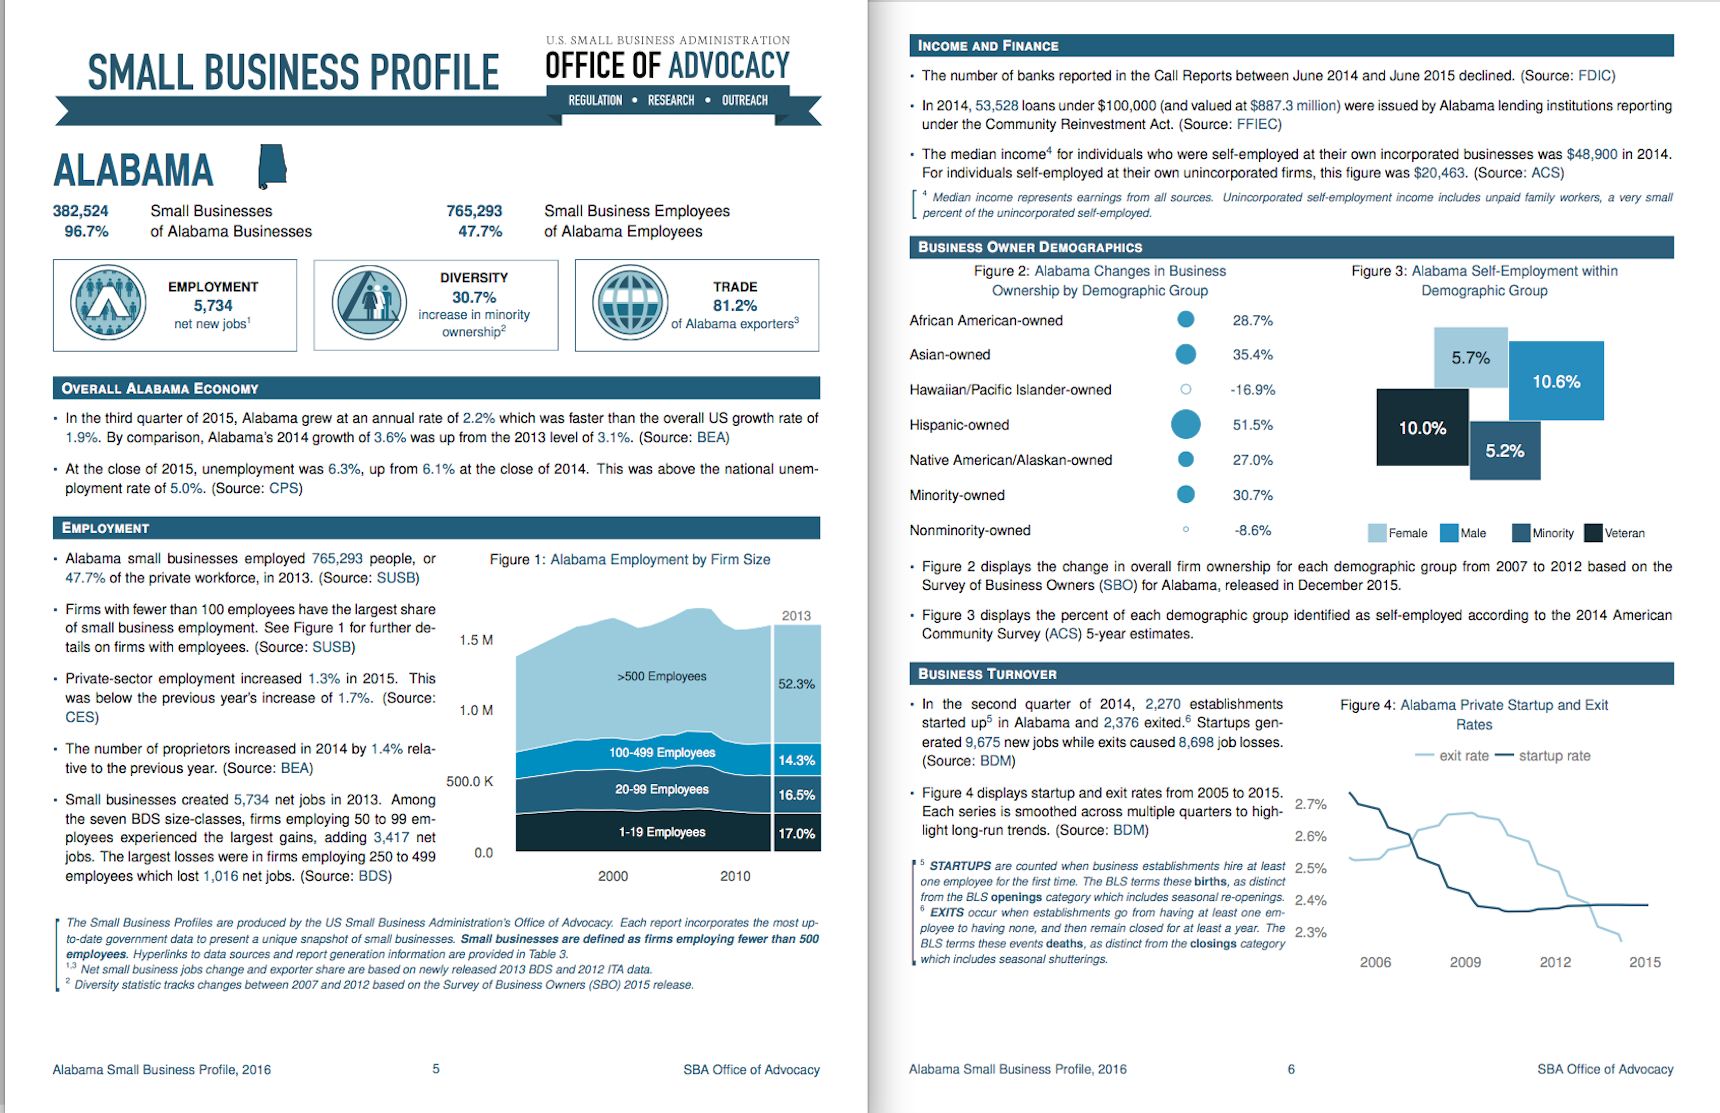

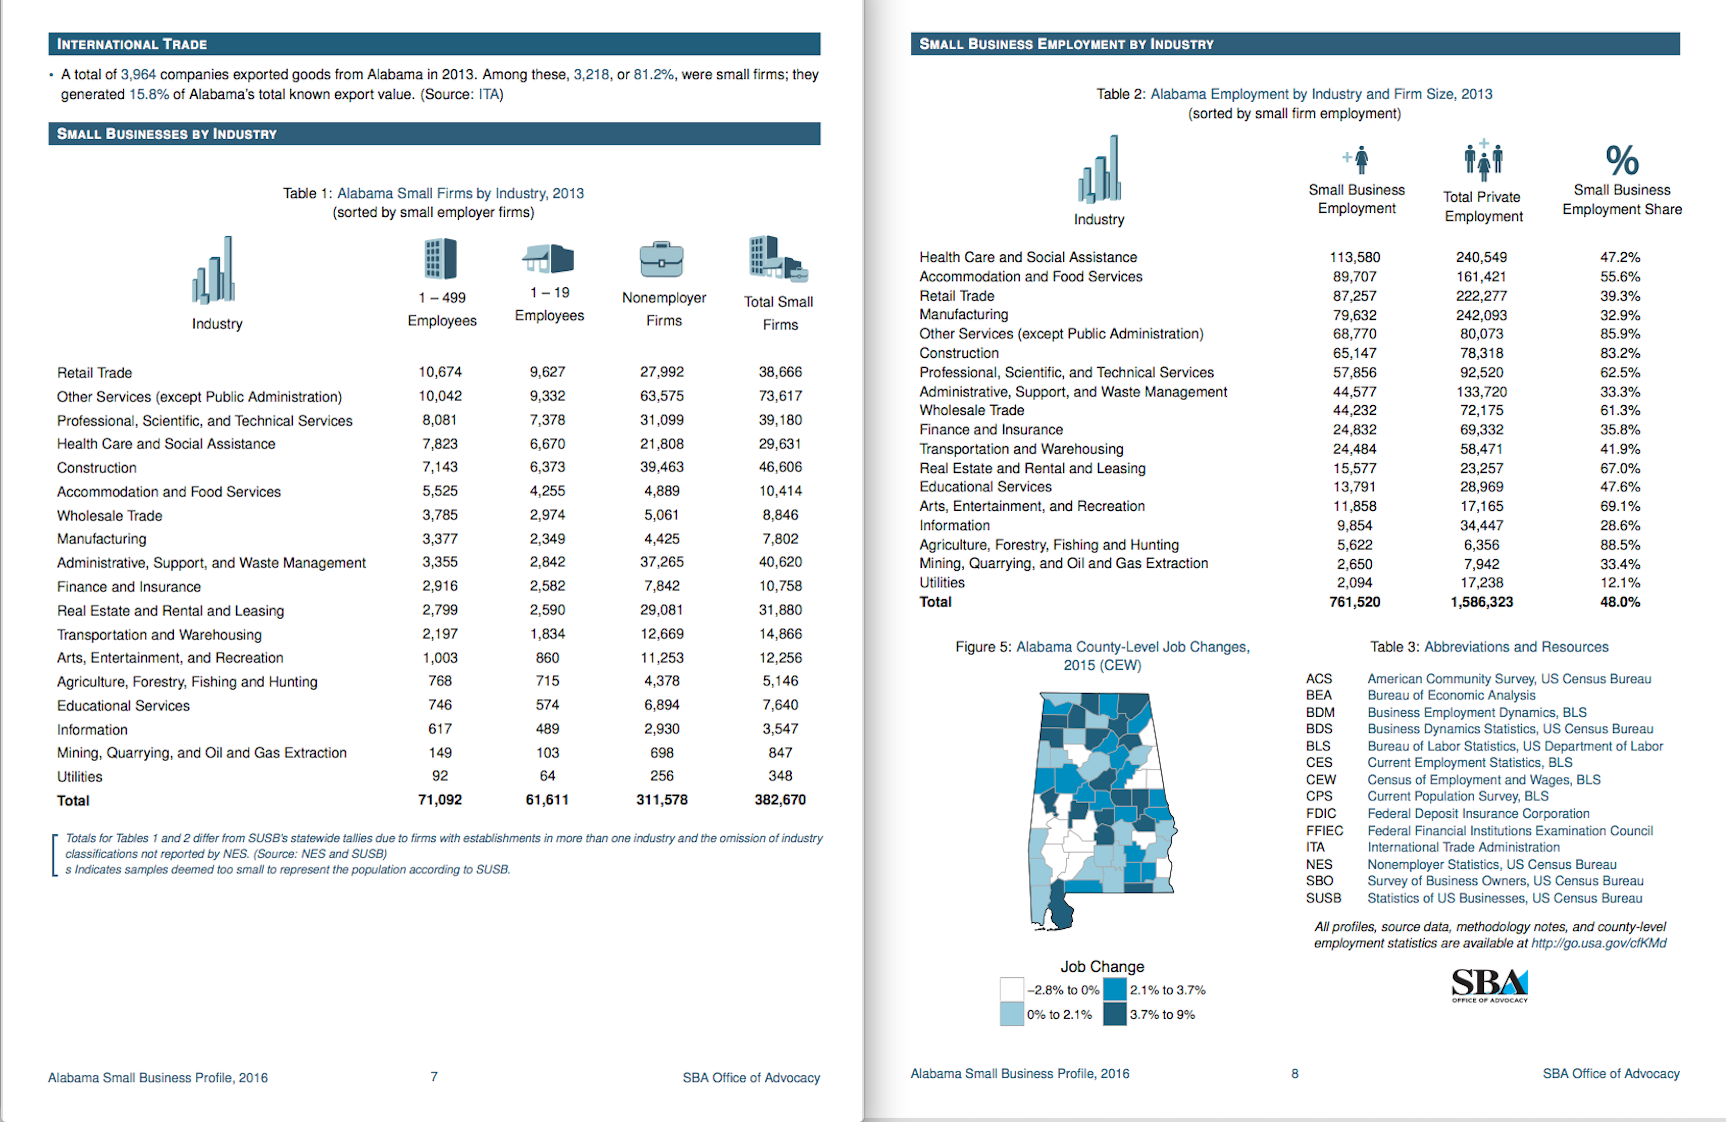

# Loading the file with PyPDF

In [ ]:
import PyPDF2 # import PdfFileReader

In [224]:
def load_pdf(path_file):
    
    def get_content(fp_in):
        content = []
        pdf = PyPDF2.PdfFileReader(fp_in)
        number_of_pages = pdf.getNumPages()
        for i in xrange(number_of_pages):
            page = pdf.getPage(i).extractText().split()
            content.append(page)
        return content
    
    if path_file.startswith('s3://'):  
        fs = s3fs.S3FileSystem()
        with fs.open(path_file, 'rb') as fp_in:
            content = get_content(fp_in)

    else:
        fp_in = file(path_file,'rb')
        content = get_content(fp_in)

    return content

In [225]:
%%time
files = list_files(path_local)[1]
path_file = path(path_local,files)
file_pdf = load_pdf(path_file)

/experiments/_home/racostap/Alabama.pdf
CPU times: user 232 ms, sys: 12 ms, total: 244 ms
Wall time: 234 ms


In [226]:
for fp in file_pdf:
    print fp 
    print '\n'

[u'AlabamaSmallBusiness,2016', u'5', u'SBAofAdvocacy', u'ALABAMA', u'382,524', u'SmallBusinesses', u'765,293', u'SmallBusinessEmployees', u'96.7%', u'ofAlabamaBusinesses', u'47.7%', u'ofAlabamaEmployees', u'EMPLOYMENT', u'5,734', u'netnewjobs', u'1', u'DIVERSITY', u'30.7%', u'increaseinminority', u'ownership', u'2', u'TRADE', u'81.2%', u'ofAlabamaexporters', u'3', u'O', u'VERALL', u'A', u'LABAMA', u'E', u'CONOMY', u'\u0141', u'Inthethirdquarterof2015,Alabamagrewatanannualrateof', u'2.2%', u'whichwasfasterthantheoverallUSgrowthrateof', u'1.9%', u".Bycomparison,Alabama's2014growthof", u'3.6%', u'wasupfromthe2013levelof', u'3.1%', u'.(Source:', u'BEA', u')', u'\u0141', u'Atthecloseof2015,unemploymentwas', u'6.3%', u',upfrom', u'6.1%', u'atthecloseof2014.Thiswasabovethenationalunem-', u'ploymentrateof', u'5.0%', u'.(Source:', u'CPS', u')', u'E', u'MPLOYMENT', u'\u0141', u'Alabamasmallbusinessesemployed', u'765,293', u'people,or', u'47.7%', u'oftheprivateworkforce,in2013.(Source:', u'SUSB',

In [205]:
file_pdf[2]

[u'AlabamaSmallBusiness,2016',
 u'7',
 u'SBAofAdvocacy',
 u'I',
 u'NTERNATIONAL',
 u'T',
 u'RADE',
 u'\u0141',
 u'Atotalof',
 u'3,964',
 u'companiesexportedgoodsfromAlabamain2013.Amongthese,',
 u'3,218',
 u',or',
 u'81.2%',
 u',weresmallms;they',
 u'generated',
 u'15.8%',
 u"ofAlabama'stotalknownexportvalue.(Source:",
 u'ITA',
 u')',
 u'S',
 u'MALL',
 u'B',
 u'USINESSESBY',
 u'I',
 u'NDUSTRY',
 u'Table1:',
 u'AlabamaSmallFirmsbyIndustry,2013',
 u'(sortedbysmallemployerms)',
 u'Industry',
 u'1\u0152499',
 u'Employees',
 u'1\u015219',
 u'Employees',
 u'Nonemployer',
 u'Firms',
 u'TotalSmall',
 u'Firms',
 u'RetailTrade',
 u'10,674',
 u'9,627',
 u'27,992',
 u'38,666',
 u'OtherServices(exceptPublicAdministration)',
 u'10,042',
 u'9,332',
 u'63,575',
 u'73,617',
 u'Professional,,andTechnicalServices',
 u'8,081',
 u'7,378',
 u'31,099',
 u'39,180',
 u'HealthCareandSocialAssistance',
 u'7,823',
 u'6,670',
 u'21,808',
 u'29,631',
 u'Construction',
 u'7,143',
 u'6,373',
 u'39,463',
 u'46,606',
 u

# Loading the file with Tabula

In [212]:
import tabula

In [213]:
def load_pdf(path_file):
    if path_file.startswith('s3://'):  
        fs = s3fs.S3FileSystem()
        with fs.open(path_file, 'rb') as fp_in:
            pdf = .read_pdf(fp_in,multiple_tables=True)
    else:
        pdf = tabula.read_pdf(path_file,multiple_tables=True)
    return pdf

In [214]:
# tabula.read_pdf(file_path,multiple_tables=True, pages = 3)

In [216]:
%%time
files = list_files(path_local)[1]
path_file = path(path_local,files)
file_pdf = load_pdf(path_file)

/experiments/_home/racostap/Alabama.pdf
CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 2.53 s


In [211]:
file_pdf

[      0                                                  1        2  \
 0   NaN  of small business employment. See Figure 1 for...      NaN   
 1   NaN      tails on firms with employees. (Source: SUSB)    1.5 M   
 2     •  Private-sector employment increased 1.3% in 20...      NaN   
 3   NaN  was below the previous year’s increase of 1.7%...      NaN   
 4   NaN                                               CES)    1.0 M   
 5     •  The number of proprietors increased in 2014 by...      NaN   
 6   NaN           tive to the previous year. (Source: BEA)      NaN   
 7   NaN                                                NaN      NaN   
 8   NaN                                                NaN  500.0 K   
 9   NaN                                                NaN      NaN   
 10    •  Small businesses created 5,734 net jobs in 201...      NaN   
 11  NaN  the seven BDS size-classes, firms employing 50...      NaN   
 12  NaN  ployees experienced the largest gains, adding ...     

# Loading the file with pdf_query

In [227]:
import pdfquery

In [11]:
def load_pdf(path_file):
    if path_file.startswith('s3://'):  
        fs = s3fs.S3FileSystem()
        with fs.open(path_file, 'rb') as fp_in:
            pdf = pdfquery.PDFQuery(fp_in)
            pdf.load()
    else:
        pdf = pdfquery.PDFQuery(path_file)
        pdf.load()        
    return pdf

In [149]:
%%time
files = list_files(path_local)[1]
path_file = path(path_local,files)
file_pdf = load_pdf(path_file)

## Finding some text and retrieving the coordinates

### Report for Alabama

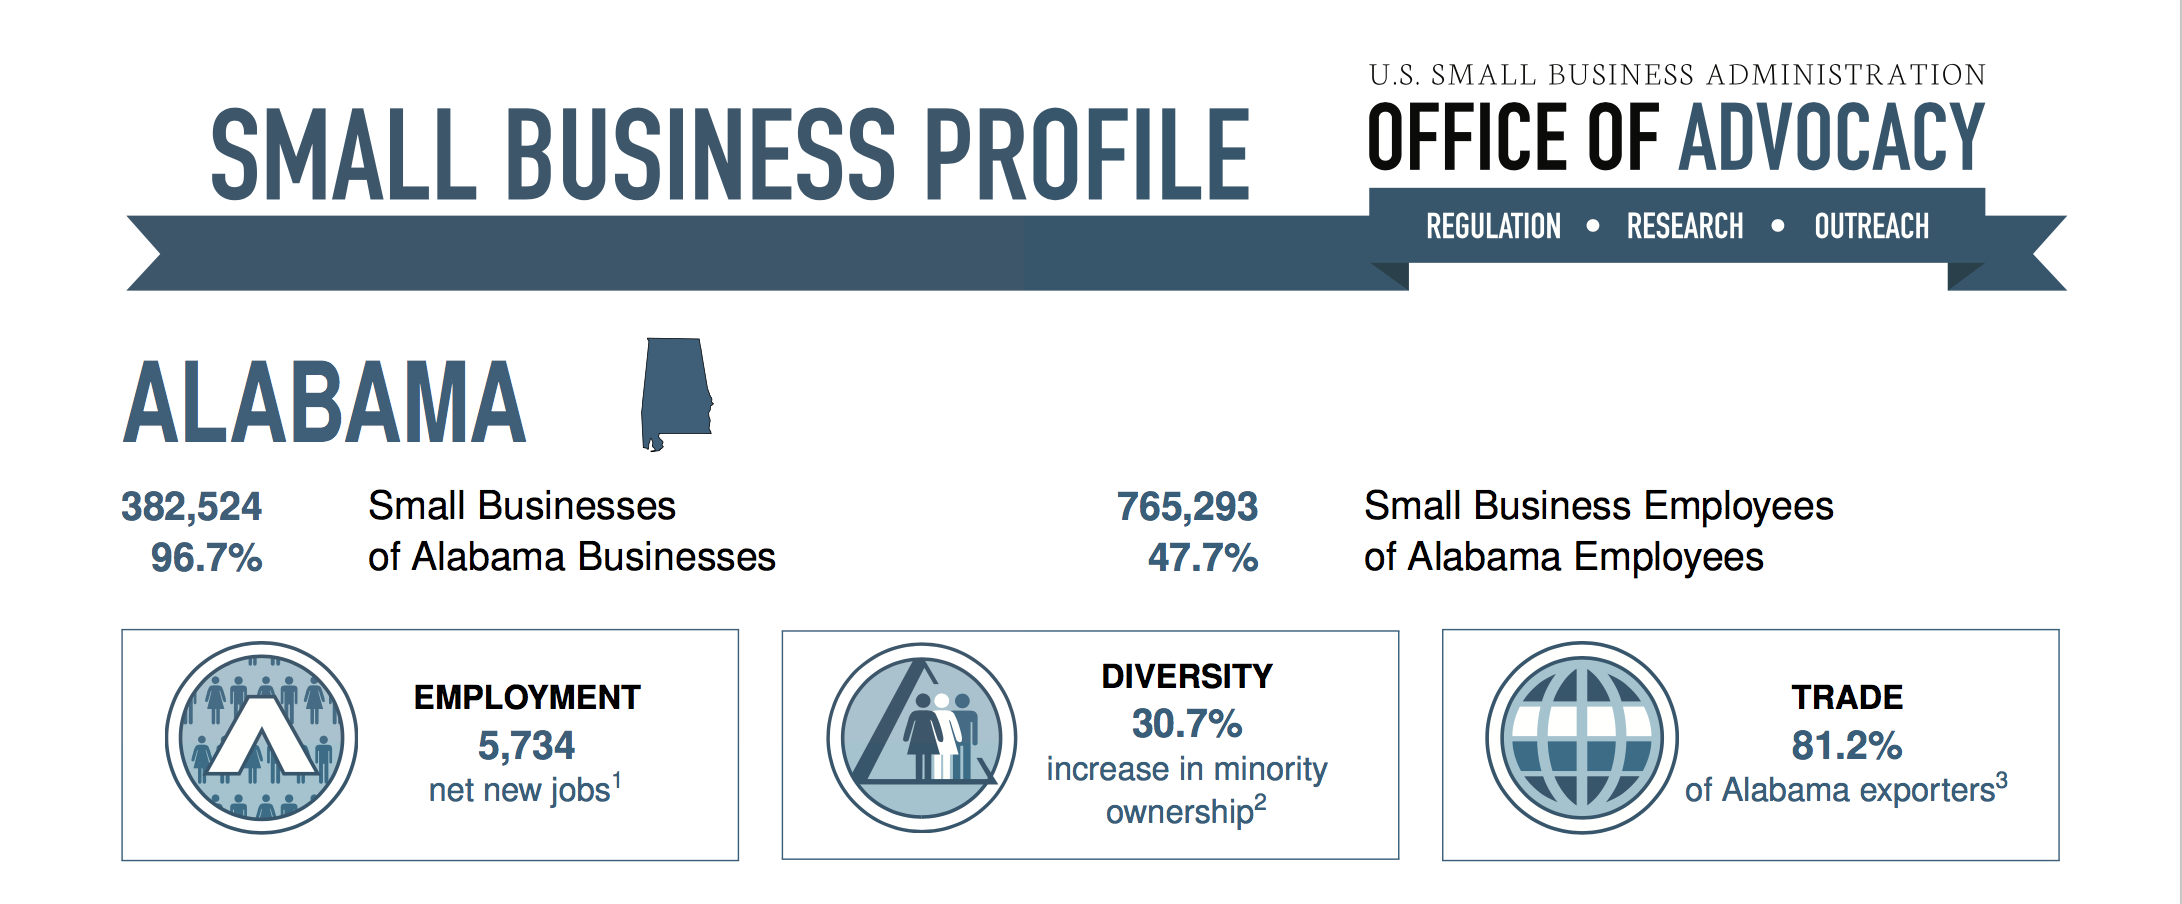

### Report for Alaska

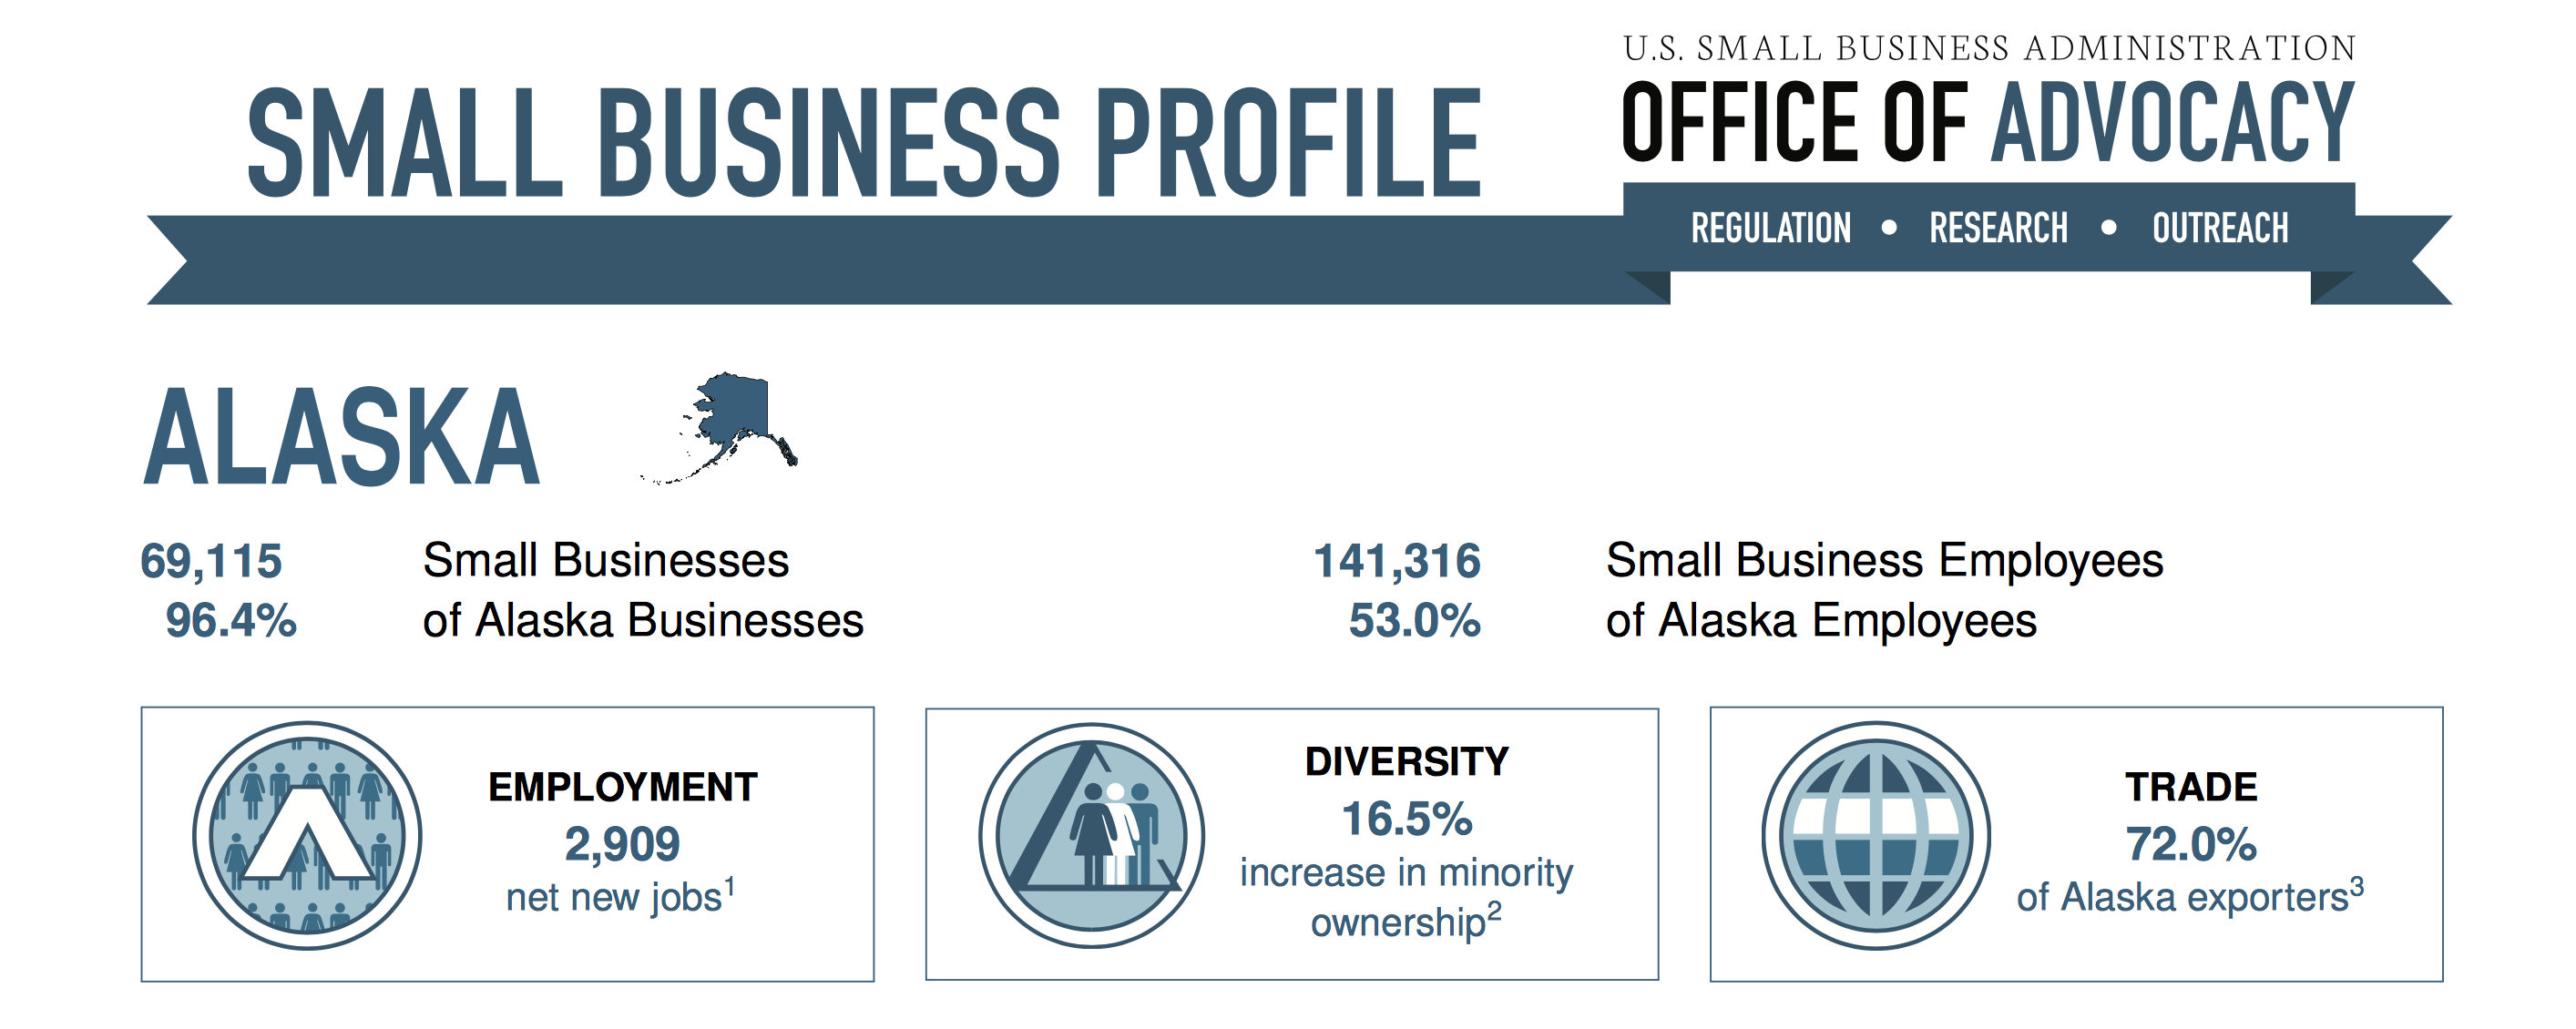

In [13]:
def getCoordinates(pdf,query, type_search = "Line"):
        name = pdf.pq('LTText%sHorizontal:contains("%s")' % (type_search,query))
        for n in name:
            d = dict()
            d["left_corner"] = math.floor(float(n.layout.x0)* 1000)/1000.0
            d["bottom_corner"] = math.floor(float(n.layout.y0)* 1000)/1000.0
            d["right_corner"] = math.ceil(float(n.layout.x1)* 1000)/1000.0
            d["upper_corner"] = math.ceil(float(n.layout.y1)* 1000)/1000.0
            d["text"] = n.layout.get_text()
            d["pageid"] = int(float(n.iterancestors('LTPage').next().layout.pageid))
            yield d

In [14]:
g = getCoordinates(file_pdf,'Small Businesses', type_search='Line')
d = next(g,None)
d

{'bottom_corner': 635.368,
 'left_corner': 103.344,
 'pageid': 1,
 'right_corner': 190.135,
 'text': u'Small Businesses\n',
 'upper_corner': 648.985}

## Retrieving text around given a set of  coordinates

In [16]:
file_pdf.pq(('LTPage[pageid="%s"] LTTextBoxHorizontal:overlaps_bbox("%f,%f,%f,%f")' % (d['pageid'],
                                                                                  d['left_corner'],
                                                                                  d['bottom_corner'],
                                                                                  d['right_corner'],
                                                                                  d['upper_corner']))).text()

'Small Businesses\nof Alabama Businesses'

In [17]:
left_corner = 0
file_pdf.pq(('LTPage[pageid="%s"] LTTextBoxHorizontal:overlaps_bbox("%f,%f,%f,%f")' % (d['pageid'],
                                                                                  left_corner,
                                                                                  d['bottom_corner'],
                                                                                  d['right_corner'],
                                                                                  d['upper_corner']))).text()

'382,524\n96.7% Small Businesses\nof Alabama Businesses'

## Reading several fields all at once

In [18]:
KeyFigures = ['EMPLOYMENT',
              'DIVERSITY',
              'TRADE']    
delta_bottom = 30

Info = [('with_formatter', 'text')]

for kf in KeyFigures:
    g = getCoordinates(pdf=file_pdf,query=kf,type_search="Box")
    d = next(g,None)
    Info.append(tuple((kf,'LTPage[pageid="%s"] LTTextBoxHorizontal:overlaps_bbox("%f,%f,%f,%f")'%(d['pageid'],
                                                                                                   d["left_corner"],
                                                                                                   d["bottom_corner"]-delta_bottom,
                                                                                                   d["right_corner"],
                                                                                                   d["upper_corner"]))))
    info = file_pdf.extract(Info)
info

{'DIVERSITY': 'DIVERSITY 30.7% increase in minority ownership2',
 'EMPLOYMENT': 'EMPLOYMENT 5,734 net new jobs1',
 'TRADE': 'TRADE\n81.2% of Alabama exporters3'}

## A better example

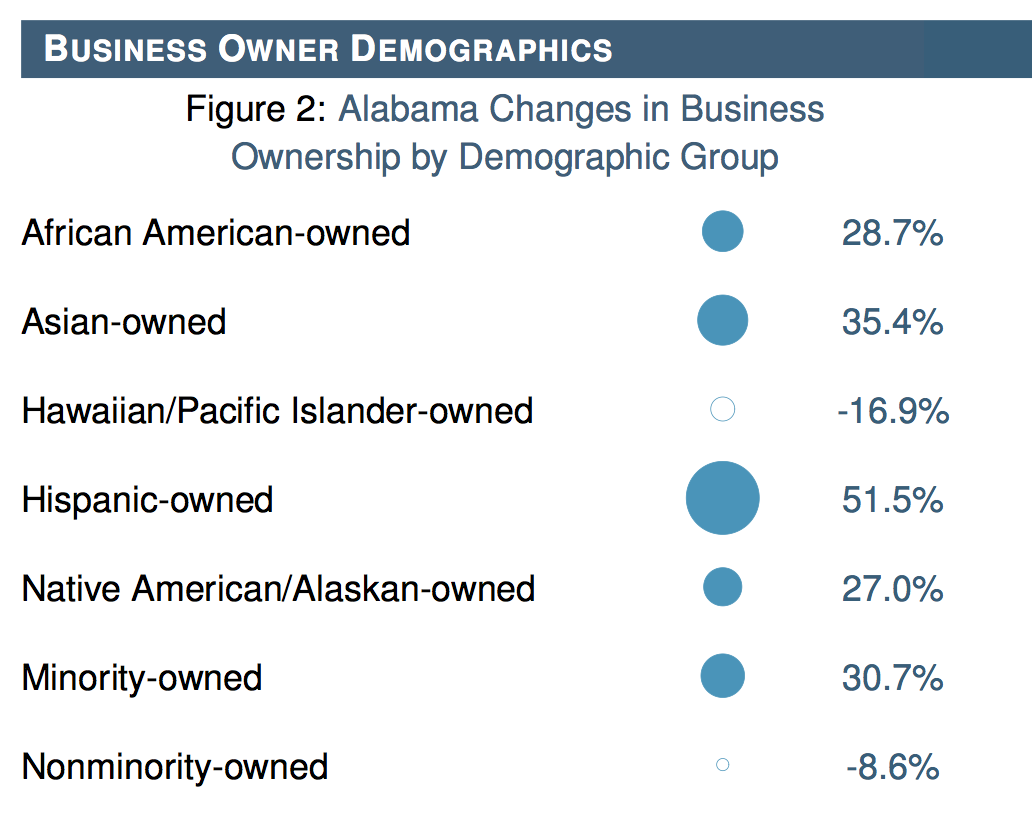

In [19]:
def info1(file_pdf):
    col_right_align = 300
    DemographicGroup = ['American-owned',
                        'Asian-owned',
                        'Islander-owned',
                        'Hispanic-owned',
                        'Alaskan-owned',
                        'Minority-owned',
                        'Nonminority-owned']    
    
    DemographicInfo = [('with_formatter', 'text')]
    
    for dg in DemographicGroup:
        g = getCoordinates(pdf=file_pdf,query=dg,type_search="Line")
        d = next(g,None)
        DemographicInfo.append(tuple((dg,'LTTextLineHorizontal:in_bbox("%f,%f,%f,%f")'%(d["left_corner"],
                                                                                        d["bottom_corner"],
                                                                                        col_right_align,
                                                                                        d["upper_corner"]))))
    info = file_pdf.extract(DemographicInfo)
    return info

In [20]:
info1(file_pdf)

{'Alaskan-owned': 'Native American/Alaskan-owned l 27.0%',
 'American-owned': 'African American-owned l 28.7%',
 'Asian-owned': 'Asian-owned l 35.4%',
 'Hispanic-owned': 'Hispanic-owned l 51.5%',
 'Islander-owned': u'Hawaiian/Paci\ufb01c Islander-owned l -16.9%',
 'Minority-owned': 'Minority-owned l 30.7%',
 'Nonminority-owned': 'Nonminority-owned l -8.6%'}

## How about a full table?

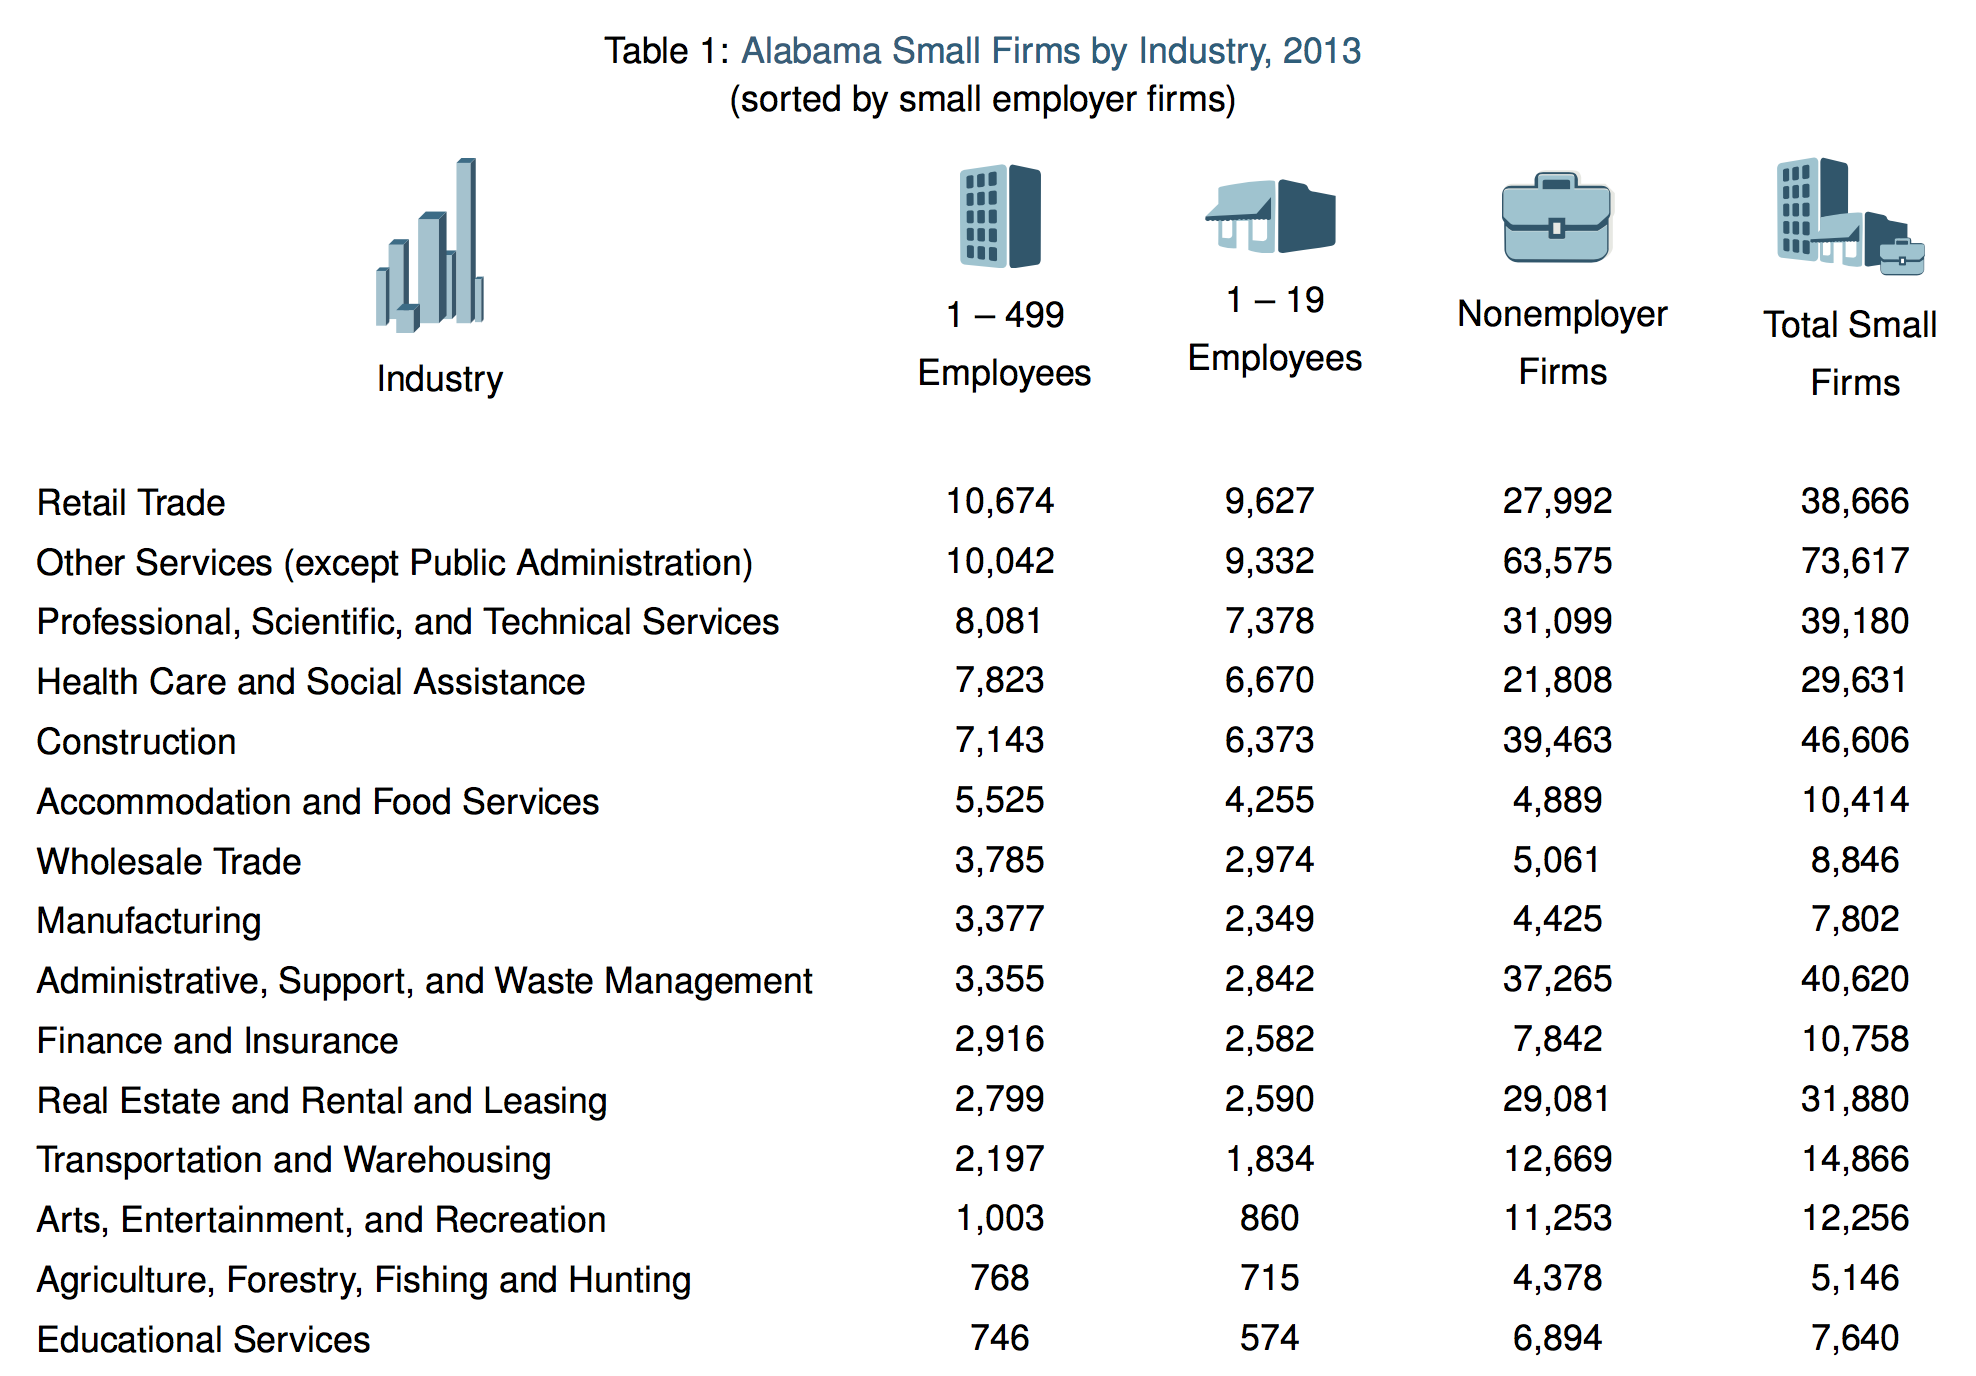

In [21]:
def getTable(file_pdf, col_width, row_space, row_height,title,bottom_corner_dif,headers,col_left_align):
    
    table = list()
    table.append(headers)
    
    g = getCoordinates(pdf=file_pdf,query=title,type_search="Line")
    d = next(g,None)
    
    pageid = d['pageid']
    bottom_corner = d['bottom_corner'] - bottom_corner_dif

    while 1:
        columns = (c for c in xrange(len(headers)))
        boxes = list()
        for c in columns:
            boxes.append(tuple(('col_%s' %(c),
                               'LTPage[pageid="%s"] LTTextLineHorizontal:overlaps_bbox("%f,%f,%f,%f")' % (pageid,
                                                                                                          col_left_align[c],
                                                                                                          bottom_corner,
                                                                                                          col_left_align[c]+col_width,
                                                                                                          bottom_corner+row_height))))



        columns = [c for c in xrange(len(headers))]
        row = file_pdf.extract(boxes)
        columns = [row['col_{}'.format(c)].text() for c in columns]
        table.append(columns)
        if 'Total' in row['col_0'].text():
            break

        bottom_corner -= row_space
    return table

In [22]:
def info2(file_pdf):
    col_width = 35
    col_left_align = [50,295,371,449,532]
    row_space = 16.78
    row_height = 14
    bottom_corner_dif = 126.91
    headers = ['Industry',
                '1-499 Employees',
                '1-19 Employees',
                'Nonemployer Firms',
                'Total Small Firms'] 

    table = getTable(col_left_align=col_left_align,
                     col_width=col_width,
                     file_pdf=file_pdf,
                     headers=headers,
                     row_height=row_height,
                     row_space = row_space,
                     bottom_corner_dif=bottom_corner_dif,
                     title = "Table 1")
                     
    return table

In [23]:
info2(file_pdf)

[['Industry',
  '1-499 Employees',
  '1-19 Employees',
  'Nonemployer Firms',
  'Total Small Firms'],
 ['Retail Trade', '10,674', '9,627', '27,992', '38,666'],
 ['Other Services (except Public Administration)',
  '10,042',
  '9,332',
  '63,575',
  '73,617'],
 [u'Professional, Scienti\ufb01c, and Technical Services',
  '8,081',
  '7,378',
  '31,099',
  '39,180'],
 ['Health Care and Social Assistance', '7,823', '6,670', '21,808', '29,631'],
 ['Construction', '7,143', '6,373', '39,463', '46,606'],
 ['Accommodation and Food Services', '5,525', '4,255', '4,889', '10,414'],
 ['Wholesale Trade', '3,785', '2,974', '5,061', '8,846'],
 ['Manufacturing', '3,377', '2,349', '4,425', '7,802'],
 ['Administrative, Support, and Waste Management',
  '3,355',
  '2,842',
  '37,265',
  '40,620'],
 ['Finance and Insurance', '2,916', '2,582', '7,842', '10,758'],
 ['Real Estate and Rental and Leasing', '2,799', '2,590', '29,081', '31,880'],
 ['Transportation and Warehousing', '2,197', '1,834', '12,669', '14,8

## Another example

In [25]:
def info3(file_pdf):
    col_width = 35
    col_left_align = [50,325,400,532]
    row_space = 13.5
    row_height = 12.4
    bottom_corner_dif = 115.5

    headers = ['Industry',
               'Small Business Employment',
               'Total Private Employment',
               'Small Business Emp Share']    
    
    table = getTable(col_left_align=col_left_align,
                     col_width=col_width,
                     file_pdf=file_pdf,
                     headers=headers,
                     row_height=row_height,
                     row_space = row_space,
                     bottom_corner_dif=bottom_corner_dif,
                     title = "Table 2"
     )

    return table

In [26]:
info3(file_pdf)

[['Industry',
  'Small Business Employment',
  'Total Private Employment',
  'Small Business Emp Share'],
 ['Health Care and Social Assistance', '113,580', '240,549', '47.2%'],
 ['Accommodation and Food Services', '89,707', '161,421', '55.6%'],
 ['Retail Trade', '87,257', '222,277', '39.3%'],
 ['Manufacturing', '79,632', '242,093', '32.9%'],
 ['Other Services (except Public Administration)',
  '68,770',
  '80,073',
  '85.9%'],
 ['Construction', '65,147', '78,318', '83.2%'],
 [u'Professional, Scienti\ufb01c, and Technical Services',
  '57,856',
  '92,520',
  '62.5%'],
 ['Administrative, Support, and Waste Management',
  '44,577',
  '133,720',
  '33.3%'],
 ['Wholesale Trade', '44,232', '72,175', '61.3%'],
 ['Finance and Insurance', '24,832', '69,332', '35.8%'],
 ['Transportation and Warehousing', '24,484', '58,471', '41.9%'],
 ['Real Estate and Rental and Leasing', '15,577', '23,257', '67.0%'],
 ['Educational Services', '13,791', '28,969', '47.6%'],
 ['Arts, Entertainment, and Recreation

## How about several pdf's at the same time?

In [27]:
def process_file(path_file):
    file_pdf = load_pdf(path_file)
    d = dict()
    d['file'] = path_file
    d.update(info1(file_pdf))
    x = info2(file_pdf)
    d['industry'] = x
    x = info3(file_pdf)
    d['employment'] = x
    return d

In [28]:
# https://stackoverflow.com/questions/29494001/how-can-i-abort-a-task-in-a-multiprocessing-pool-after-a-timeout
def abortable_worker(func, *args, **kwargs):
    timeout = kwargs.get('timeout', None)
    p = ThreadPool(1)
    res = p.apply_async(func, args=args)
    try:
        out = res.get(timeout)  # Wait timeout seconds for func to complete.
        return out
    except multiprocessing.TimeoutError:
        print("Aborting due to timeout ")
        p.terminate()
        raise

In [29]:
if __name__ == '__main__':    
    result = list()
    pool = multiprocessing.Pool(maxtasksperchild=1)
    files = list_files(s3)
    files = files[0:4]
    for i in files:
        abortable_func = partial(abortable_worker, process_file, timeout=60)
        path_file = path(s3,i)
        pool.apply_async(abortable_func, args=(path_file, ), callback=result.append)
    pool.close()
    pool.join()

s3://eh-home/ehda-calvin/SBA_study/pdf/Alaska.pdf
s3://eh-home/ehda-calvin/SBA_study/pdf/Alabama.pdf
s3://eh-home/ehda-calvin/SBA_study/pdf/American_Samoa.pdf
s3://eh-home/ehda-calvin/SBA_study/pdf/Arizona.pdf


## Analysis

In [ ]:
## Difficulties, customize, when no read and to do in S3